# Predicting 2019-20 NFL Season Total Fantasy Football Points Scored by Each Player Using Historical Data from 2009 - 2018 ; Linear Regression.

## Emon K. Butts
### *Last Updated:* 04/29/2020

___

###  **Summary:**

According to [Forbes](https://www.forbes.com/), between actual expenditures and ad revenues, the Fantasy Football industry generates anywhere from 40 something-billion to over 70 billion per year in tangible and intangible activity [(Forbes, Brian Goff)](https://www.forbes.com/sites/briangoff/2013/08/20/the-70-billion-fantasy-football-market/#1ef36f42755c). This is due to the growing community of people taking part in Fantasy and Sports betting, fueling the growing industry. Fantasy has grown into a yearly tradition for many, allowing them to prove their “NFL Fantasy Football knowledge superiority” to that of their friends and family through friendly competition. “The FSTA [estimates](http://www.fsta.org/mk/FSTA-MK-011311.docx.zip) that the average fantasy gamer spends 3 hours per week managing a team(s), translating to 1.2 billion hours for 23 million players over a 17 week season” [(Forbes, Brian Goff)](https://www.forbes.com/sites/briangoff/2013/08/20/the-70-billion-fantasy-football-market/#1ef36f42755c). Surprisingly, I happen to be one of those people. Obsessed with NFL Football, Analytics and destroying my friends has pushed me to resort to analytics and machine learning as a tool. Here I show you my first attempt where I created a predictor for season total fantasy points built on a multiple linear regression model using sklearn. This predictor would serve as a pre draft tool to help identify high performers, specifically in the later rounds where probability of fantasy success decreases.


![https://www.si.com/nfl/2019/10/06/christian-mccaffrey-panthers-jaguars](christian_mccaffery_nfl_sportsillustrated.jpg)

**Photo Credit**: [Sports Illustrated](https://www.si.com/nfl/2019/10/06/christian-mccaffrey-panthers-jaguars)

___


### *TABLE OF CONTENTS:*
### 1.) IMPORT MODULES, DATA & CUSTOMIZING THE DISPLAY OF PANDAS DATAFRAMES 
### 2.) BUIDLING THE DATASET
        A.) Data Source (No Longer in Service)
        B.) CREATING MASTER DATA FILE
### 3.) CLEANING, ENHANCING AND WRANGLING THE DATASET 
### 4.) DESCRIBING THE DATASET
        A.) Quick Description
        B.) Visualizing the Means of Primary Stats by Position
### 5.) SEPERATING DATASET INTO LEARNING AND PREDICTION SETS
### 6.) FEATURE SELECTION USING A FILTERING METHOD; PEARSON CORRELATION
### 7.) LINEAR REGRESION; BUILDING AND RUNNING THE MODEL
        A.) Model Settings
        B.) ANALYSIS OF MODEL PERFORAMANCE; TESTING
### 8. CROSS VALIDATION
### 9.) MODEL PREDICTIONS; PREDICTING 2019 SEASON FANTASY POINTS
___

## 1. IMPORT MODULES, DATA & CUSTOMIZING THE DISPLAY OF PANDAS DATAFRAMES 

In [1]:
# import the necessary modules

from urllib.request import urlopen
import json
import requests
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt  
import numpy as np
import datetime
import sklearn

# import the necessary packages to build and run model

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline

# setting pandas dataframe display options 
# this will allow up to 100 columns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## 2. Building the Dataset

### A. DATA SOURCE (NO LONGER IN SERVICE)

The below code executes an API provided by a fantasy football platform called "sleepers.io". This API was free and provided access to historical NFL stats going back to 2009. However, recently it was removed and is no longer supported but luckily I saved the data that I pulled from the API to build the below model. Even though the API is no longer working I will still explain how the data was retrived.The API here allows you to pull annual stat totals by player. The script loops through the years of 2009 through 2018 slighty cleaning the data and saving them into individual csv files for storage. Next, wer we run another script to retrive a dataset with historical information around the players for example height, weight, age etc.

In [2]:
# API SHUTDOWN !!!! NO LONGER WORKING BUT HIGHLIGHTS HOW THE DATA WAS RETRIEVED
# -----------------------------------------------------------------------------
#
#
# creating the season total files and master player data
#
# ACCESS API TO DOWNLOAD EACH INDIVIDUAL SEASON TOTAL STAT FILE IN LOOP
#
# create a python list of the years to feed api 
#
# loop through years and download each data set and 
#
# years = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
#
# for year in years:
#  
#     url = 'https://api.sleeper.app/v1/stats/nfl/regular/'+ year # url with the year as a variable pulling from list
#     json_obj = urlopen(url) # opening url
#     data = json.load(json_obj) 
#     new_data = pd.DataFrame(data)
#     new_data = new_data.T # transposing the dataset
#     new_data['year'] = year # add a colummn for the year
#     file_name = 'file{}.csv' 
#     new_data.to_csv(file_name.format(year), header=True) # export dataset to csv
#
# ACCESS API TO DOWNLOAD UPDATED PLAYER DATA TO MERGE
#
# 
# url_2 = 'https://api.sleeper.app/v1/players/nfl'
# json_obj_2 = urlopen(url_2)
# data_2 = json.load(json_obj_2)
# data_2 =  pd.DataFrame(data_2)
# data_2 = data_2.T
# data_2.to_csv('master_player_data.csv')


### B. CREATING MASTER DATA FILE 

The below code creates a master dataset by concatenating the individual csv files containing NFL annual season total stats from 2009-2018 into one dataframe. The data was then merged with the master player dataset with player information using on the columns player id to further enhance the dataset. This master file was then saved to a csv for storage and future analysis.

In [3]:
# CREATING THE MASTER DATASET W/SEPERATE FILES AGGREGATED BY YEAR FROM API ABOVE

# script will concatenate aggregated all yearly files, merge it with the player data and save raw data to a file

# --------------------------------------------------------

# setting the object files to hold list of aggregated yearly data

files = sorted(glob('file*.csv')) 

# concatenating all annual files to one master file

files = pd.concat((pd.read_csv(file) for file in files),ignore_index = False, axis = 0, join ='outer', sort=False)

# import individual player data as well

player_data = pd.read_csv('master_player_data.csv') 

# rename column to player id to match in future to other datasets

files.rename( columns={'Unnamed: 0':'player_id'}, inplace=True)

# merging player data to the master file to one master file

files = pd.merge(files, player_data, on ='player_id', how='left')

# print dataset to a csv file

#files.to_csv('A.) merge.csv')

# view the head of the final dataset

files.head(10) 

,player_id,blk_kick,blk_kick_ret_yd,cmp_pct,def_pass_def,def_td,ff,fg_blkd,fga,fgm,fgm_lng,fgm_pct,fum,fum_lost,fum_rec,fum_ret_yd,gms_active,gp,gs,int,int_ret_yd,kr,kr_lng,kr_td,kr_yd,kr_ypa,pass_2pt,pass_att,pass_cmp,pass_int,pass_lng,pass_rtg,pass_sack,pass_sack_yds,pass_td,pass_yd,pass_ypa,pass_ypc,pr,pr_lng,pr_td,pr_yd,pr_ypa,pts_allow,pts_ppr,pts_std,punt_avg,punt_blkd,punt_in_20,punt_net_avg,...,rec_10_19,rec_20_29,rec_30_39,rec_5_9,rec_td_40p,rush_td_40p,xpmiss,Unnamed: 0,active,age,birth_city,birth_country,birth_date,birth_state,college,depth_chart_order,depth_chart_position,espn_id,fantasy_data_id,fantasy_positions,first_name,full_name,gsis_id,hashtag,height,high_school,injury_body_part,injury_notes,injury_start_date,injury_status,last_name,news_updated,number,position,practice_description,practice_participation,rotowire_id,rotoworld_id,search_first_name,search_full_name,search_last_name,search_rank,sport,sportradar_id,stats_id,status,team,weight,yahoo_id,years_exp
0,6250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6250,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3916426.0,21183.0,['DL'],Eurndraus,Eurndraus Bryant,NaN,#EurndrausBryant-NFL-FA-0,NaN,NaN,NaN,NaN,NaN,NaN,Bryant,NaN,0.0,DT,NaN,NaN,NaN,NaN,eurndraus,eurndrausbryant,bryant,9999999.0,nfl,9ff46edb-988f-4c8a-ad56-0502808ca1a6,NaN,Inactive,NaN,NaN,32538.0,0.0
1,6177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6177,True,23.0,NaN,NaN,1996-08-09,NaN,Western Illinois,2.0,NT,3121634.0,20934.0,['DL'],Khalen,Khalen Saunders,00-0035656,#KhalenSaunders-NFL-KC-99,"6'0""",NaN,NaN,NaN,NaN,NaN,Saunders,NaN,99.0,NT,NaN,NaN,13746.0,NaN,khalen,khalensaunders,saunders,1099.0,nfl,757c55e1-2f3a-41d2-a211-16bf577a1586,NaN,Active,KC,324.0,31916.0,0.0
2,5870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5870,True,22.0,NaN,NaN,1997-05-27,NaN,Duke,1.0,QB,3917792.0,20841.0,['QB'],Daniel,Daniel Jones,00-0035710,#DanielJones-NFL-NYG-8,"6'5""",NaN,NaN,NaN,NaN,Probable,Jones,1.577068e+12,8.0,QB,NaN,NaN,13491.0,13963.0,daniel,danieljones,jones,299.0,nfl,0042266b-cb28-4012-bfd2-06650badad97,879981.0,Active,NYG,221.0,31838.0,0.0
3,4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4297,True,25.0,NaN,NaN,1994-04-29,NaN,Iowa State,NaN,NaN,3892776.0,19145.0,['LB'],Jarnor,Jarnor Jones,NaN,#JarnorJones-NFL-FA-40,"6'3""",NaN,NaN,NaN,NaN,NaN,Jones,NaN,40.0,ILB,NaN,NaN,NaN,NaN,jarnor,jarnorjones,jones,9999999.0,nfl,508a854c-2fc5-47e1-9376-0151f45963c1,NaN,Inactive,NaN,210.0,30454.0,2.0
4,1347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1347,True,29.0,NaN,NaN,1990-06-30,NaN,Arkansas,NaN,NaN,15940.0,14866.0,['TE'],Chris,Chris Gragg,NaN,#ChrisGragg-NFL-FA-87,"6'3""",NaN,NaN,NaN,NaN,NaN,Gragg,NaN,87.0,TE,NaN,NaN,8788.0,NaN,chris,chrisgragg,gragg,9999999.0,nfl,36521d92-2c2c-4ae4-9b60-9928c3167e30,465638.0,Inactive,NaN,244.0,26845.0,6.0
5,5300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300,True,25.0,NaN,NaN,1994-11-15,NaN,None,2.0,R

## 3. CLEANING, ENHANCING AND WRANGLING THE DATASET 

The below performs the following steps to clean up the master dataset getting rid of uncecessary information and preparing for further analysis.

- Remove all other positions outside of QB, RB, WR and TE since these are the only positions relavant in my league. This could be different for every Fantasy Football league.


- Remove all the player that have not recorded a point as they are irrelavant in fantasy as drafts typically won't reach players are this far on the depth chart. There are a total of 12 teams with xx players.


- Drop all the rows where points were not recorded. As this is likely a player that does very active in the teams offense.


- Then we removed all of the null data points an replaced them with zeros. This makes it easier for python to work with the data and perform calculations.


In [4]:
# importing the complete dataset wrangling

# importing data

#data = pd.read_csv('A.) merge.csv')
data = files
# definig the relevant positions to the model

pos = ['QB','RB','WR','TE'] 

# removing the unecessary positions

data = data.loc[data['position'].isin(pos)]

# drop players with no recorded points

data = data.dropna(subset=['pts_ppr'])

# drop rows where ppr is missing (i.e. NaN)

data = data[pd.notnull(data['pts_ppr'])] 

# filling blank stats with zeros '0' instead of NaN.

data.fillna(0, inplace=True) 

# preview the dataset

data.head(10)

,player_id,blk_kick,blk_kick_ret_yd,cmp_pct,def_pass_def,def_td,ff,fg_blkd,fga,fgm,fgm_lng,fgm_pct,fum,fum_lost,fum_rec,fum_ret_yd,gms_active,gp,gs,int,int_ret_yd,kr,kr_lng,kr_td,kr_yd,kr_ypa,pass_2pt,pass_att,pass_cmp,pass_int,pass_lng,pass_rtg,pass_sack,pass_sack_yds,pass_td,pass_yd,pass_ypa,pass_ypc,pr,pr_lng,pr_td,pr_yd,pr_ypa,pts_allow,pts_ppr,pts_std,punt_avg,punt_blkd,punt_in_20,punt_net_avg,...,rec_10_19,rec_20_29,rec_30_39,rec_5_9,rec_td_40p,rush_td_40p,xpmiss,Unnamed: 0,active,age,birth_city,birth_country,birth_date,birth_state,college,depth_chart_order,depth_chart_position,espn_id,fantasy_data_id,fantasy_positions,first_name,full_name,gsis_id,hashtag,height,high_school,injury_body_part,injury_notes,injury_start_date,injury_status,last_name,news_updated,number,position,practice_description,practice_participation,rotowire_id,rotoworld_id,search_first_name,search_full_name,search_last_name,search_rank,sport,sportradar_id,stats_id,status,team,weight,yahoo_id,years_exp
86,670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7,1.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,670,False,37.0,0.0,0.0,1980-05-20,0.0,San Diego State,0.0,0,5437.0,11821.0,['WR'],Kassim,Kassim Osgood,0,#KassimOsgood-NFL-FA-14,"6'5""",0.0,0,0,0,0,Osgood,0.000000e+00,14.0,WR,0,0,0.0,0.0,kassim,kassimosgood,osgood,9999999.0,nfl,d00b8cd0-86fb-4d44-9816-7011747ad3fd,0.0,Inactive,0,220.0,0.0,12.0
87,111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.8,63.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111,True,35.0,0.0,0.0,1984-05-19,0.0,UCLA,2.0,TE,9614.0,3061.0,['TE'],Marcedes,Marcedes Lewis,00-0024243,#MarcedesLewis-NFL-GB-89,"6'6""",0.0,0,0,0,0,Lewis,1.576526e+12,89.0,TE,0,0,4891.0,3615.0,marcedes,marcedeslewis,lewis,483.0,nfl,9c21e9af-681c-41ef-9b00-fbc9e1668ed1,214197.0,Active,GB,275.0,7777.0,13.0
93,175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,25.0,54.0,0.0,635.0,25.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,14.0,0.0,90.0,5.3,0.0,64.0,42.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175,True,34.0,0.0,0.0,1985-05-31,0.0,Kansas State,0.0,0,11270.0,4556.0,['WR'],Jordy,Jordy Nelson,00-0026176,#JordyNelson-NFL-FA-82,"6'3""",0.0,0,0,0,0,Nelson,1.554316e+12,82.0,WR,0,0,5691.0,4731.0,jordy,jordynelson,nelson,9999999.0,nfl,9f2aebe4-b654-4f0e-a437-ec46f20b6bfe,227442.0,Inactive,0,217.0,8813.0,11.0
115,695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,16.0,16.0,12.0,0.0,0.0,52.0,101.0,2.0,1296.0,24.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,28.0,5.6,0.0,94.2,56.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,695,True,34.0,0.0,0.0,1985-04-12,0.0,Ohio State,1.0,RWR,10453.0,12109.0,['WR'],Ted,Ted Ginn,00-0025396,#TedGinn-NFL-NO-19,"5'11""",0.0,0,0,0,0,Ginn,1.577070e+12,19.0,WR,0,0,5214.0,4168.0,ted,tedginn,ginn,179.0,nfl,3aef6950-1c19-4454-a3d0-0afe9634ea9f,246804.0,Active,NO,180.0,8263.0,12.0
127,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.2,109.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,True,34.0,0.0,0.0,1985-03-11,0.0,Miami,1.0,TE,10475.0,1658.0,['TE'],Greg,Greg Olsen,00-0025418,#GregOlsen-NFL-CAR-88,"6'6""",0.0,0,0,0,Probable,Olsen,1.577069e+12,88.0,TE,0,0,5206.0,4190.0,greg,gregolsen,olsen,156.0,nfl,587d0a98-7ec5-45a5-adba-8af26e8f256b,230925.0,Active,CAR,255.0,8285.0,12.0
162,145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,16.0,16.0,12.0,0.0,0.0,1.0,8.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.9,178.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145,False,30.0,0.0,0.0,1987-06-19,0.0,Illinois,0.

In [5]:
list(data.columns)

['player_id',
 'blk_kick',
 'blk_kick_ret_yd',
 'cmp_pct',
 'def_pass_def',
 'def_td',
 'ff',
 'fg_blkd',
 'fga',
 'fgm',
 'fgm_lng',
 'fgm_pct',
 'fum',
 'fum_lost',
 'fum_rec',
 'fum_ret_yd',
 'gms_active',
 'gp',
 'gs',
 'int',
 'int_ret_yd',
 'kr',
 'kr_lng',
 'kr_td',
 'kr_yd',
 'kr_ypa',
 'pass_2pt',
 'pass_att',
 'pass_cmp',
 'pass_int',
 'pass_lng',
 'pass_rtg',
 'pass_sack',
 'pass_sack_yds',
 'pass_td',
 'pass_yd',
 'pass_ypa',
 'pass_ypc',
 'pr',
 'pr_lng',
 'pr_td',
 'pr_yd',
 'pr_ypa',
 'pts_allow',
 'pts_ppr',
 'pts_std',
 'punt_avg',
 'punt_blkd',
 'punt_in_20',
 'punt_net_avg',
 'punt_net_yd',
 'punt_tb',
 'punt_yds',
 'punts',
 'qb_hit',
 'rec',
 'rec_2pt',
 'rec_lng',
 'rec_pct',
 'rec_td',
 'rec_tgt',
 'rec_yd',
 'rec_ypr',
 'rec_ypt',
 'rush_2pt',
 'rush_att',
 'rush_lng',
 'rush_td',
 'rush_yd',
 'rush_ypa',
 'sack',
 'sack_yd',
 'safe',
 'safe_allow',
 'st_ff',
 'st_fum_rec',
 'st_td',
 'st_tkl_solo',
 'tkl',
 'tkl_ast',
 'tkl_loss',
 'tkl_solo',
 'xp_blkd',
 'xpa

In [6]:
cols = ['cmp_pct', 'fum', 'fum_lost', 'fum_rec', 'gms_active', 'gp', 'gs',
        'kr', 'kr_lng', 'kr_td', 'kr_yd', 'kr_ypa', 'pass_2pt', 'pass_att', 
        'pass_cmp', 'pass_int', 'pass_lng', 'pass_rtg', 'pass_sack', 'pass_sack_yds', 
        'pass_td', 'pass_yd', 'pass_ypa', 'pass_ypc', 'pr', 'pr_lng', 'pr_td', 'pr_yd', 
        'pr_ypa', 'pts_ppr', 'pts_std', 'rec', 'rec_2pt', 'rec_lng', 'rec_pct', 'rec_td', 
        'rec_tgt', 'rec_yd', 'rec_ypr', 'rec_ypt', 'rush_2pt', 'rush_att', 'rush_lng', 
        'rush_td', 'rush_yd', 'rush_ypa', 'year', 'off_snp', 'st_snp', 'pass_fd', 'pts_half_ppr', 
        'punt_lng', 'rush_fd', 'td', 'bonus_pass_yd_300', 'bonus_pass_yd_400', 'bonus_rec_rb', 
        'bonus_rec_te', 'bonus_rec_wr', 'bonus_rec_yd_100', 'bonus_rec_yd_200', 'bonus_rush_yd_100', 
        'bonus_rush_yd_200', 'pass_inc', 'pass_cmp_40p', 'rec_40p', 'rec_fd', 'rush_40p', 
        'bonus_pass_cmp_25', 'bonus_rush_att_20', 'bonus_rush_rec_yd_100', 'bonus_rush_rec_yd_200', 
        'pass_td_40p', 'rec_0_4', 'rec_10_19', 'rec_20_29', 'rec_30_39', 'rec_5_9', 'rec_td_40p', 'rush_td_40p']

The below code loops through the list of columns creating new columns calculating the cumulative sum called cumsum1_{columns name}. It then loops through again to create a list of calculating the running totals for each season, subtracting that current year from the cumulative sum. This column is called cumsum2_{columns name}. Lastly, the number of columns is printed to confirm the addition of the new columns.

In [7]:
# loop to creating cumultative sum colums

for x in cols:
    txt = 'cumsum1_{}'
    data[txt.format(x)] = data.sort_values('year').groupby(['full_name'])[x].cumsum()
    
# loop to create a running total of points *coming into the season*

for x in cols:
    txt2 = 'cumsum2_{}'
    data[txt2.format(x)] = data.sort_values('year').groupby(['full_name'])[x].cumsum()- data[x]
    
len(data.columns)

439

Then we view the list of column names to confirm the naming worked.

In [8]:
list(data.columns)

['player_id',
 'blk_kick',
 'blk_kick_ret_yd',
 'cmp_pct',
 'def_pass_def',
 'def_td',
 'ff',
 'fg_blkd',
 'fga',
 'fgm',
 'fgm_lng',
 'fgm_pct',
 'fum',
 'fum_lost',
 'fum_rec',
 'fum_ret_yd',
 'gms_active',
 'gp',
 'gs',
 'int',
 'int_ret_yd',
 'kr',
 'kr_lng',
 'kr_td',
 'kr_yd',
 'kr_ypa',
 'pass_2pt',
 'pass_att',
 'pass_cmp',
 'pass_int',
 'pass_lng',
 'pass_rtg',
 'pass_sack',
 'pass_sack_yds',
 'pass_td',
 'pass_yd',
 'pass_ypa',
 'pass_ypc',
 'pr',
 'pr_lng',
 'pr_td',
 'pr_yd',
 'pr_ypa',
 'pts_allow',
 'pts_ppr',
 'pts_std',
 'punt_avg',
 'punt_blkd',
 'punt_in_20',
 'punt_net_avg',
 'punt_net_yd',
 'punt_tb',
 'punt_yds',
 'punts',
 'qb_hit',
 'rec',
 'rec_2pt',
 'rec_lng',
 'rec_pct',
 'rec_td',
 'rec_tgt',
 'rec_yd',
 'rec_ypr',
 'rec_ypt',
 'rush_2pt',
 'rush_att',
 'rush_lng',
 'rush_td',
 'rush_yd',
 'rush_ypa',
 'sack',
 'sack_yd',
 'safe',
 'safe_allow',
 'st_ff',
 'st_fum_rec',
 'st_td',
 'st_tkl_solo',
 'tkl',
 'tkl_ast',
 'tkl_loss',
 'tkl_solo',
 'xp_blkd',
 'xpa

In [9]:
cols2 = ['cumsum1_cmp_pct', 'cumsum1_fum', 'cumsum1_fum_lost', 'cumsum1_fum_rec', 
         'cumsum1_gms_active', 'cumsum1_gp', 'cumsum1_gs', 'cumsum1_kr', 'cumsum1_kr_lng', 
         'cumsum1_kr_td', 'cumsum1_kr_yd', 'cumsum1_kr_ypa', 'cumsum1_pass_2pt', 
         'cumsum1_pass_att', 'cumsum1_pass_cmp', 'cumsum1_pass_int', 'cumsum1_pass_lng', 
         'cumsum1_pass_rtg', 'cumsum1_pass_sack', 'cumsum1_pass_sack_yds', 'cumsum1_pass_td', 
         'cumsum1_pass_yd', 'cumsum1_pass_ypa', 'cumsum1_pass_ypc', 'cumsum1_pr', 'cumsum1_pr_lng', 
         'cumsum1_pr_td', 'cumsum1_pr_yd', 'cumsum1_pr_ypa', 'cumsum1_pts_ppr', 'cumsum1_pts_std', 
         'cumsum1_rec', 'cumsum1_rec_2pt', 'cumsum1_rec_lng', 'cumsum1_rec_pct', 'cumsum1_rec_td', 
         'cumsum1_rec_tgt', 'cumsum1_rec_yd', 'cumsum1_rec_ypr', 'cumsum1_rec_ypt', 'cumsum1_rush_2pt', 
         'cumsum1_rush_att', 'cumsum1_rush_lng', 'cumsum1_rush_td', 'cumsum1_rush_yd', 'cumsum1_rush_ypa', 
         'cumsum1_year', 'cumsum1_off_snp', 'cumsum1_st_snp', 'cumsum1_pass_fd', 'cumsum1_pts_half_ppr', 
         'cumsum1_punt_lng', 'cumsum1_rush_fd', 'cumsum1_td', 'cumsum1_bonus_pass_yd_300', 
         'cumsum1_bonus_pass_yd_400', 'cumsum1_bonus_rec_rb', 'cumsum1_bonus_rec_te', 'cumsum1_bonus_rec_wr', 
         'cumsum1_bonus_rec_yd_100', 'cumsum1_bonus_rec_yd_200', 'cumsum1_bonus_rush_yd_100', 
         'cumsum1_bonus_rush_yd_200', 'cumsum1_pass_inc', 'cumsum1_pass_cmp_40p', 'cumsum1_rec_40p', 
         'cumsum1_rec_fd', 'cumsum1_rush_40p', 'cumsum1_bonus_pass_cmp_25', 'cumsum1_bonus_rush_att_20', 
         'cumsum1_bonus_rush_rec_yd_100', 'cumsum1_bonus_rush_rec_yd_200', 'cumsum1_pass_td_40p', 
         'cumsum1_rec_0_4', 'cumsum1_rec_10_19', 'cumsum1_rec_20_29', 'cumsum1_rec_30_39', 
         'cumsum1_rec_5_9', 'cumsum1_rec_td_40p', 'cumsum1_rush_td_40p']

In [10]:
cols3 = ['cumsum2_cmp_pct', 'cumsum2_fum', 'cumsum2_fum_lost', 'cumsum2_fum_rec', 
         'cumsum2_gms_active', 'cumsum2_gp', 'cumsum2_gs', 'cumsum2_kr', 'cumsum2_kr_lng', 
         'cumsum2_kr_td', 'cumsum2_kr_yd', 'cumsum2_kr_ypa', 'cumsum2_pass_2pt', 'cumsum2_pass_att', 
         'cumsum2_pass_cmp', 'cumsum2_pass_int', 'cumsum2_pass_lng', 'cumsum2_pass_rtg', 
         'cumsum2_pass_sack', 'cumsum2_pass_sack_yds', 'cumsum2_pass_td', 'cumsum2_pass_yd', 
         'cumsum2_pass_ypa', 'cumsum2_pass_ypc', 'cumsum2_pr', 'cumsum2_pr_lng', 'cumsum2_pr_td', 
         'cumsum2_pr_yd', 'cumsum2_pr_ypa', 'cumsum2_pts_ppr', 'cumsum2_pts_std', 'cumsum2_rec', 'cumsum2_rec_2pt', 
         'cumsum2_rec_lng', 'cumsum2_rec_pct', 'cumsum2_rec_td', 'cumsum2_rec_tgt', 'cumsum2_rec_yd', 
         'cumsum2_rec_ypr', 'cumsum2_rec_ypt', 'cumsum2_rush_2pt', 'cumsum2_rush_att', 'cumsum2_rush_lng', 
         'cumsum2_rush_td', 'cumsum2_rush_yd', 'cumsum2_rush_ypa', 'cumsum2_year', 'cumsum2_off_snp', 
         'cumsum2_st_snp', 'cumsum2_pass_fd', 'cumsum2_pts_half_ppr', 'cumsum2_punt_lng', 'cumsum2_rush_fd', 
         'cumsum2_td', 'cumsum2_bonus_pass_yd_300', 'cumsum2_bonus_pass_yd_400', 'cumsum2_bonus_rec_rb', 
         'cumsum2_bonus_rec_te', 'cumsum2_bonus_rec_wr', 'cumsum2_bonus_rec_yd_100', 'cumsum2_bonus_rec_yd_200', 
         'cumsum2_bonus_rush_yd_100', 'cumsum2_bonus_rush_yd_200', 'cumsum2_pass_inc', 'cumsum2_pass_cmp_40p', 
         'cumsum2_rec_40p', 'cumsum2_rec_fd', 'cumsum2_rush_40p', 'cumsum2_bonus_pass_cmp_25', 
         'cumsum2_bonus_rush_att_20', 'cumsum2_bonus_rush_rec_yd_100', 'cumsum2_bonus_rush_rec_yd_200', 
         'cumsum2_pass_td_40p', 'cumsum2_rec_0_4', 'cumsum2_rec_10_19', 'cumsum2_rec_20_29', 'cumsum2_rec_30_39', 
         'cumsum2_rec_5_9', 'cumsum2_rec_td_40p', 'cumsum2_rush_td_40p']

Next, we used those same cumulative sum columns to calculate cumulative average columns by dividing the culumns cumulative sum by cumulative sum of the number of games played. This was also done for the running cumulatvie sum as well creating, running cumulative average columns for each statistic. The number of columns was printed again to confirm the addition of the newly added columns to the master dataset.

In [11]:
# calculate cumulative average columns and add to dataset

for x in cols2:
    txt3 = 'cumavg1_{}'
    data[txt3.format(x)] = data[x]/data['cumsum1_gp']
    
# calculate average columns for live dataset that will predict next years fantasy points and add to dataset

for x in cols3:
    txt4 = 'cumavg2_{}'
    data[txt4.format(x)] = data[x]/data['cumsum1_gp']
    
# print the number of columns to verify additional columns were created.
    
print('number of columns:')
len(data.columns)

number of columns:


599

The below code calculates the current age of a player in each season by subtracting the birth year from the current year being analzed. This also allows this calculation to be correct any time the code is run. Then we list out all of the current columns in the dataframe for a quality check.

In [12]:
# calculate the current age of the player in each season

#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date


data['birth_year'] = pd.DatetimeIndex(data['birth_date']).year

data['current_age'] = data['year'] - data['birth_year']    
# print the number of columns to verify additional columns were created.
    
print('number of columns:')
len(data.columns)

number of columns:


601

## 4. DESCRIBING THE DATASET

## A. Quick Description

The code from this section is used to quickly describe the dataset to get a better understanding of what it is we are working with. The dataset is fairly large and will require some prior knowledge about the dataset to create the model with few errors.

In [13]:
# view the raw dataset

data.head(100)

,player_id,blk_kick,blk_kick_ret_yd,cmp_pct,def_pass_def,def_td,ff,fg_blkd,fga,fgm,fgm_lng,fgm_pct,fum,fum_lost,fum_rec,fum_ret_yd,gms_active,gp,gs,int,int_ret_yd,kr,kr_lng,kr_td,kr_yd,kr_ypa,pass_2pt,pass_att,pass_cmp,pass_int,pass_lng,pass_rtg,pass_sack,pass_sack_yds,pass_td,pass_yd,pass_ypa,pass_ypc,pr,pr_lng,pr_td,pr_yd,pr_ypa,pts_allow,pts_ppr,pts_std,punt_avg,punt_blkd,punt_in_20,punt_net_avg,...,cumavg2_cumsum2_rec_2pt,cumavg2_cumsum2_rec_lng,cumavg2_cumsum2_rec_pct,cumavg2_cumsum2_rec_td,cumavg2_cumsum2_rec_tgt,cumavg2_cumsum2_rec_yd,cumavg2_cumsum2_rec_ypr,cumavg2_cumsum2_rec_ypt,cumavg2_cumsum2_rush_2pt,cumavg2_cumsum2_rush_att,cumavg2_cumsum2_rush_lng,cumavg2_cumsum2_rush_td,cumavg2_cumsum2_rush_yd,cumavg2_cumsum2_rush_ypa,cumavg2_cumsum2_year,cumavg2_cumsum2_off_snp,cumavg2_cumsum2_st_snp,cumavg2_cumsum2_pass_fd,cumavg2_cumsum2_pts_half_ppr,cumavg2_cumsum2_punt_lng,cumavg2_cumsum2_rush_fd,cumavg2_cumsum2_td,cumavg2_cumsum2_bonus_pass_yd_300,cumavg2_cumsum2_bonus_pass_yd_400,cumavg2_cumsum2_bonus_rec_rb,cumavg2_cumsum2_bonus_rec_te,cumavg2_cumsum2_bonus_rec_wr,cumavg2_cumsum2_bonus_rec_yd_100,cumavg2_cumsum2_bonus_rec_yd_200,cumavg2_cumsum2_bonus_rush_yd_100,cumavg2_cumsum2_bonus_rush_yd_200,cumavg2_cumsum2_pass_inc,cumavg2_cumsum2_pass_cmp_40p,cumavg2_cumsum2_rec_40p,cumavg2_cumsum2_rec_fd,cumavg2_cumsum2_rush_40p,cumavg2_cumsum2_bonus_pass_cmp_25,cumavg2_cumsum2_bonus_rush_att_20,cumavg2_cumsum2_bonus_rush_rec_yd_100,cumavg2_cumsum2_bonus_rush_rec_yd_200,cumavg2_cumsum2_pass_td_40p,cumavg2_cumsum2_rec_0_4,cumavg2_cumsum2_rec_10_19,cumavg2_cumsum2_rec_20_29,cumavg2_cumsum2_rec_30_39,cumavg2_cumsum2_rec_5_9,cumavg2_cumsum2_rec_td_40p,cumavg2_cumsum2_rush_td_40p,birth_year,current_age
86,670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.70,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980,29
87,111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.80,63.80,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984,25
93,175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,25.0,54.0,0.0,635.0,25.4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,17.0,14.0,0.0,90.0,5.3,0.0,64.00,42.00,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,24
115,695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,16.0,16.0,12.0,0.0,0.0,52.0,101.0,2.0,1296.0,24.9,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,28.0,5.6,0.0,94.20,56.20,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,24
127,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.20,109.20,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0

The below shows the size of the dataset with 4,195 rows and 602 columns.

In [14]:
# size of the raw dataset / rows,columns

data.shape

(4195, 601)

Below we can see the memory usage and the number of entries for each column.

In [15]:
# amount of memory used by the raw dataset

data.memory_usage(deep = True)

Index                          197400
player_id                      253650
blk_kick                        33560
blk_kick_ret_yd                 33560
cmp_pct                         33560
                                ...  
cumavg2_cumsum2_rec_5_9         33560
cumavg2_cumsum2_rec_td_40p      33560
cumavg2_cumsum2_rush_td_40p     33560
birth_year                      33560
current_age                     33560
Length: 602, dtype: int64

The below further review the memory usage and columns with each datatype. See the number of each datatye below:

- 1 boolean column


- 569 float64 columns


- 24 object columns

In [16]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4195 entries, 86 to 47997
Columns: 601 entries, player_id to current_age
dtypes: bool(1), float64(569), int64(7), object(24)
memory usage: 24.3 MB


Here we can see the columns of categorical and numerical data listed out.

In [17]:
# determine the numerical and categorical features in dataset

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

print('Categorical Features:')
print(list(categorical_features))
print('')
print('Numerical Features:')
print(list(numeric_features))


Categorical Features:
['player_id', 'Unnamed: 0', 'birth_date', 'college', 'depth_chart_position', 'fantasy_positions', 'first_name', 'full_name', 'gsis_id', 'hashtag', 'height', 'injury_body_part', 'injury_notes', 'injury_start_date', 'injury_status', 'last_name', 'position', 'search_first_name', 'search_full_name', 'search_last_name', 'sport', 'sportradar_id', 'status', 'team']

Numerical Features:
['blk_kick', 'blk_kick_ret_yd', 'cmp_pct', 'def_pass_def', 'def_td', 'ff', 'fg_blkd', 'fga', 'fgm', 'fgm_lng', 'fgm_pct', 'fum', 'fum_lost', 'fum_rec', 'fum_ret_yd', 'gms_active', 'gp', 'gs', 'int', 'int_ret_yd', 'kr', 'kr_lng', 'kr_td', 'kr_yd', 'kr_ypa', 'pass_2pt', 'pass_att', 'pass_cmp', 'pass_int', 'pass_lng', 'pass_rtg', 'pass_sack', 'pass_sack_yds', 'pass_td', 'pass_yd', 'pass_ypa', 'pass_ypc', 'pr', 'pr_lng', 'pr_td', 'pr_yd', 'pr_ypa', 'pts_allow', 'pts_ppr', 'pts_std', 'punt_avg', 'punt_blkd', 'punt_in_20', 'punt_net_avg', 'punt_net_yd', 'punt_tb', 'punt_yds', 'punts', 'qb_hit', 

The below is a correlation matrix of all numerical columns in the dataset. We can see....

In [18]:
# checking for correlations

data.corr()

,blk_kick,blk_kick_ret_yd,cmp_pct,def_pass_def,def_td,ff,fg_blkd,fga,fgm,fgm_lng,fgm_pct,fum,fum_lost,fum_rec,fum_ret_yd,gms_active,gp,gs,int,int_ret_yd,kr,kr_lng,kr_td,kr_yd,kr_ypa,pass_2pt,pass_att,pass_cmp,pass_int,pass_lng,pass_rtg,pass_sack,pass_sack_yds,pass_td,pass_yd,pass_ypa,pass_ypc,pr,pr_lng,pr_td,pr_yd,pr_ypa,pts_allow,pts_ppr,pts_std,punt_avg,punt_blkd,punt_in_20,punt_net_avg,punt_net_yd,...,cumavg2_cumsum2_rec_2pt,cumavg2_cumsum2_rec_lng,cumavg2_cumsum2_rec_pct,cumavg2_cumsum2_rec_td,cumavg2_cumsum2_rec_tgt,cumavg2_cumsum2_rec_yd,cumavg2_cumsum2_rec_ypr,cumavg2_cumsum2_rec_ypt,cumavg2_cumsum2_rush_2pt,cumavg2_cumsum2_rush_att,cumavg2_cumsum2_rush_lng,cumavg2_cumsum2_rush_td,cumavg2_cumsum2_rush_yd,cumavg2_cumsum2_rush_ypa,cumavg2_cumsum2_year,cumavg2_cumsum2_off_snp,cumavg2_cumsum2_st_snp,cumavg2_cumsum2_pass_fd,cumavg2_cumsum2_pts_half_ppr,cumavg2_cumsum2_punt_lng,cumavg2_cumsum2_rush_fd,cumavg2_cumsum2_td,cumavg2_cumsum2_bonus_pass_yd_300,cumavg2_cumsum2_bonus_pass_yd_400,cumavg2_cumsum2_bonus_rec_rb,cumavg2_cumsum2_bonus_rec_te,cumavg2_cumsum2_bonus_rec_wr,cumavg2_cumsum2_bonus_rec_yd_100,cumavg2_cumsum2_bonus_rec_yd_200,cumavg2_cumsum2_bonus_rush_yd_100,cumavg2_cumsum2_bonus_rush_yd_200,cumavg2_cumsum2_pass_inc,cumavg2_cumsum2_pass_cmp_40p,cumavg2_cumsum2_rec_40p,cumavg2_cumsum2_rec_fd,cumavg2_cumsum2_rush_40p,cumavg2_cumsum2_bonus_pass_cmp_25,cumavg2_cumsum2_bonus_rush_att_20,cumavg2_cumsum2_bonus_rush_rec_yd_100,cumavg2_cumsum2_bonus_rush_rec_yd_200,cumavg2_cumsum2_pass_td_40p,cumavg2_cumsum2_rec_0_4,cumavg2_cumsum2_rec_10_19,cumavg2_cumsum2_rec_20_29,cumavg2_cumsum2_rec_30_39,cumavg2_cumsum2_rec_5_9,cumavg2_cumsum2_rec_td_40p,cumavg2_cumsum2_rush_td_40p,birth_year,current_age
blk_kick,1.000000,0.240959,-0.016347,-0.003255,0.092600,0.051990,NaN,NaN,NaN,NaN,NaN,-0.024113,-0.020280,0.054332,0.009160,0.032605,0.040655,-0.035191,-0.001878,-0.001555,0.022769,0.004752,0.009775,0.021586,0.043117,-0.011275,-0.021955,-0.021645,-0.021677,-0.016737,-0.016080,-0.021896,-0.021703,-0.020267,-0.021555,-0.023086,-0.026437,-0.014097,-0.011270,-0.009608,-0.014899,-0.010129,NaN,-0.026285,-0.023986,-0.002409,NaN,-0.001533,-0.002104,-0.002104,...,-0.006246,-0.025421,-0.019384,-0.032929,-0.030192,-0.030085,-0.004217,-0.005608,-0.011571,-0.009125,-0.013078,-0.007483,-0.009568,-0.003626,-0.013311,-0.036430,0.018420,-0.005675,-0.030161,NaN,-0.008971,-0.026735,-0.007039,-0.004167,-0.011765,-0.010513,-0.015279,-0.011967,-0.003477,-0.006559,-0.001676,-0.008570,-0.005059,-0.008819,-0.014154,-0.005525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026985,0.003439
blk_kick_ret_yd,0.240959,1.000000,-0.007903,-0.001752,-0.001167,0.033033,NaN,NaN,NaN,NaN,NaN,-0.016899,-0.015973,0.006886,0.004930,0.020415,0.024491,-0.031427,-0.001011,-0.000837,-0.002191,0.006245,0.003453,-0.002309,0.015477,-0.006069,-0.011808,-0.011635,-0.011668,-0.008615,-0.007917,-0.011786,-0.011682,-0.010909,-0.011566,-0.003930,-0.007840,-0.010186,-0.008123,-0.005172,-0.009179,-0.006007,NaN,-0.028001,-0.025763,-0.001297,NaN,-0.000825,-0.001133,-0.001133,...,-0.010427,-0.024790,-0.016838,-0.023046,-0.027290,-0.026095,-0.031040,-0.028986,-0.006228,-0.015545,-0.015957,-0.015434,-0.015175,-0.014780,-0.031330,-0.029323,-0.015328,-0.003055,-0.015833,NaN,-0.004829,-0.014391,-0.003789,-0.002243,-0.005131,-0.005659,-0.008224,-0.006441,-0.001872,-0.003530,-0.000902,-0.004613,-0.002723,-0.004747,-0.007619,-0.002974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009211,-0.018333
cmp_pct,-0.016347,-0.007903,1.000000,-0.010798,-0.007194,-0.028472,NaN,NaN,NaN,NaN,NaN,0.466004,0.364616,-0.023988,-0.108431,0.101561,0.027230,0.211730,-0.006230,-0.005159,-0.064914,-0.060268,-0.022140,-0.059944,-0.101985,0.428648,0.606761,0.616130,0.513013,0.980560,0.995468,0.588717,0.585602,0.577093,0.605750,0.369420,0.421619,-0.054070,-0.046667,-0.025571,-0.049346,-0.057886,NaN,0.259055,0.371712,0.051894,NaN,0.004657,0.006114,0.006114,...,-0.057579,-0.146296,-0.109660,-0.126576,-0.160778,-0.148612,-

With the below see if the data is skewed and below we list the skew value for each column.

In [19]:
# checking the skew of the distributions

data.skew()

player_id                       1.262701
blk_kick                       15.648468
blk_kick_ret_yd                32.339089
cmp_pct                         6.004813
def_pass_def                   21.527765
                                 ...    
cumavg2_cumsum2_rec_5_9         0.000000
cumavg2_cumsum2_rec_td_40p      0.000000
cumavg2_cumsum2_rush_td_40p     0.000000
birth_year                     -0.415333
current_age                     1.009642
Length: 579, dtype: float64

Next, check the datatypes of all the columns

In [20]:
# checking the datatypes of the columns in the dataset

data.dtypes

player_id                       object
blk_kick                       float64
blk_kick_ret_yd                float64
cmp_pct                        float64
def_pass_def                   float64
                                ...   
cumavg2_cumsum2_rec_5_9        float64
cumavg2_cumsum2_rec_td_40p     float64
cumavg2_cumsum2_rush_td_40p    float64
birth_year                       int64
current_age                      int64
Length: 601, dtype: object

The below runs a quick description of the entire dataset calculating the count, mean, standard deviation, minimum and maximum for each column.

In [21]:
data.describe()

,blk_kick,blk_kick_ret_yd,cmp_pct,def_pass_def,def_td,ff,fg_blkd,fga,fgm,fgm_lng,fgm_pct,fum,fum_lost,fum_rec,fum_ret_yd,gms_active,gp,gs,int,int_ret_yd,kr,kr_lng,kr_td,kr_yd,kr_ypa,pass_2pt,pass_att,pass_cmp,pass_int,pass_lng,pass_rtg,pass_sack,pass_sack_yds,pass_td,pass_yd,pass_ypa,pass_ypc,pr,pr_lng,pr_td,pr_yd,pr_ypa,pts_allow,pts_ppr,pts_std,punt_avg,punt_blkd,punt_in_20,punt_net_avg,punt_net_yd,...,cumavg2_cumsum2_rec_2pt,cumavg2_cumsum2_rec_lng,cumavg2_cumsum2_rec_pct,cumavg2_cumsum2_rec_td,cumavg2_cumsum2_rec_tgt,cumavg2_cumsum2_rec_yd,cumavg2_cumsum2_rec_ypr,cumavg2_cumsum2_rec_ypt,cumavg2_cumsum2_rush_2pt,cumavg2_cumsum2_rush_att,cumavg2_cumsum2_rush_lng,cumavg2_cumsum2_rush_td,cumavg2_cumsum2_rush_yd,cumavg2_cumsum2_rush_ypa,cumavg2_cumsum2_year,cumavg2_cumsum2_off_snp,cumavg2_cumsum2_st_snp,cumavg2_cumsum2_pass_fd,cumavg2_cumsum2_pts_half_ppr,cumavg2_cumsum2_punt_lng,cumavg2_cumsum2_rush_fd,cumavg2_cumsum2_td,cumavg2_cumsum2_bonus_pass_yd_300,cumavg2_cumsum2_bonus_pass_yd_400,cumavg2_cumsum2_bonus_rec_rb,cumavg2_cumsum2_bonus_rec_te,cumavg2_cumsum2_bonus_rec_wr,cumavg2_cumsum2_bonus_rec_yd_100,cumavg2_cumsum2_bonus_rec_yd_200,cumavg2_cumsum2_bonus_rush_yd_100,cumavg2_cumsum2_bonus_rush_yd_200,cumavg2_cumsum2_pass_inc,cumavg2_cumsum2_pass_cmp_40p,cumavg2_cumsum2_rec_40p,cumavg2_cumsum2_rec_fd,cumavg2_cumsum2_rush_40p,cumavg2_cumsum2_bonus_pass_cmp_25,cumavg2_cumsum2_bonus_rush_att_20,cumavg2_cumsum2_bonus_rush_rec_yd_100,cumavg2_cumsum2_bonus_rush_rec_yd_200,cumavg2_cumsum2_pass_td_40p,cumavg2_cumsum2_rec_0_4,cumavg2_cumsum2_rec_10_19,cumavg2_cumsum2_rec_20_29,cumavg2_cumsum2_rec_30_39,cumavg2_cumsum2_rec_5_9,cumavg2_cumsum2_rec_td_40p,cumavg2_cumsum2_rush_td_40p,birth_year,current_age
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.0,4195.0,4195.0,4195.0,4195.0,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.0,4195.000000,4195.000000,4195.000000,4195.0,4195.000000,4195.000000,4195.000000,...,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.0,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.0,4195.0,4195.0,4195.0,4195.0,4195.0,4195.0,4195.0,4195.0,4195.0,4195.0,4195.0,4195.000000,4195.000000
mean,0.005721,0.028129,33.277926,0.002145,0.000954,0.019309,0.0,0.0,0.0,0.0,0.0,1.297020,0.610250,0.016925,-0.459833,12.601907,11.868653,6.162336,0.000715,0.028605,2.061740,13.189273,0.019070,48.299642,4.345669,0.058403,40.629321,25.266508,1.050298,20.955900,47.198765,2.703218,17.614064,1.810250,291.435280,1.338586,2.038331,1.762336,6.128010,0.022646,16.098689,1.006355,0.0,91.872715,69.141368,0.035280,0.0,0.000477,0.024076,0.024076,...,0.001929,1.708395,4.635634,0.071016,1.518919,11.330552,0.372796,0.235823,0.000879,1.322773,0.797378,0.040135,5.771412,0.125266,91.174042,10.347279,1.469645,0.019509,0.733760,0.0,0.010560,0.023710,0.000928,0.000076,0.028698,0.020346,0.064045,0.001574,0.000037,0.001065,0.000040,0.072604,0.001019,0.001015,0.019242,0.000286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1988.202861,26.091061
std,0.081507,0.744505,142.920874,0.046274,0.030868,0.142727,0.0,0.0,0.0,0.0,0.0,2.199293,1.102924,0.139655,3.524557,4.266604,4.688042,5.810233,0.026736,1.291416,6.618838,44.600339,0.162299,166.663258,8.901662,0.363673,129.925367,81.954144,3.401674,87.906542,206.075665,8.667595,56.979454,6.271077,949.249605,4.070812,5.413186,6.2867

In [22]:
# list all columns

print(data.columns.to_list())

['player_id', 'blk_kick', 'blk_kick_ret_yd', 'cmp_pct', 'def_pass_def', 'def_td', 'ff', 'fg_blkd', 'fga', 'fgm', 'fgm_lng', 'fgm_pct', 'fum', 'fum_lost', 'fum_rec', 'fum_ret_yd', 'gms_active', 'gp', 'gs', 'int', 'int_ret_yd', 'kr', 'kr_lng', 'kr_td', 'kr_yd', 'kr_ypa', 'pass_2pt', 'pass_att', 'pass_cmp', 'pass_int', 'pass_lng', 'pass_rtg', 'pass_sack', 'pass_sack_yds', 'pass_td', 'pass_yd', 'pass_ypa', 'pass_ypc', 'pr', 'pr_lng', 'pr_td', 'pr_yd', 'pr_ypa', 'pts_allow', 'pts_ppr', 'pts_std', 'punt_avg', 'punt_blkd', 'punt_in_20', 'punt_net_avg', 'punt_net_yd', 'punt_tb', 'punt_yds', 'punts', 'qb_hit', 'rec', 'rec_2pt', 'rec_lng', 'rec_pct', 'rec_td', 'rec_tgt', 'rec_yd', 'rec_ypr', 'rec_ypt', 'rush_2pt', 'rush_att', 'rush_lng', 'rush_td', 'rush_yd', 'rush_ypa', 'sack', 'sack_yd', 'safe', 'safe_allow', 'st_ff', 'st_fum_rec', 'st_td', 'st_tkl_solo', 'tkl', 'tkl_ast', 'tkl_loss', 'tkl_solo', 'xp_blkd', 'xpa', 'xpm', 'year', 'def_snp', 'off_snp', 'st_snp', 'tm_def_snp', 'tm_off_snp', 'tm_s

## B. VISUALIZE MEANS OF THE PRIMARY STATS RELATED TO FANTASY POINTS

In this section, I have made quick visuals of the mean of primary statistics related to scoring fantasy points aggregated by position. The below figures include:

- The mean fantasy points socred by position per season.


- The mean number of touchdowns scored by each position per season.


- The mean number of rushing attempts by each postion per season.


- The mean number of receiving targets by each postion per season.


- The mean number of passing attempts by each postion per season.

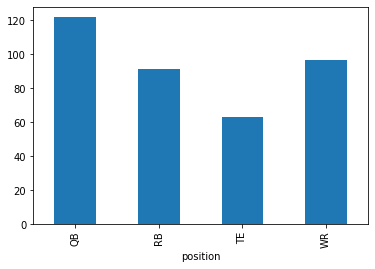

In [23]:
# compating mean fan pts per season by position

data.groupby(['position']).mean()['pts_ppr'].plot.bar()


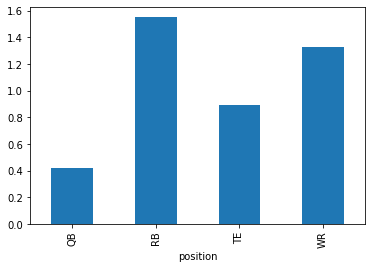

In [24]:
# compating mean touchdown by position

data.groupby(['position']).mean()['td'].plot.bar()

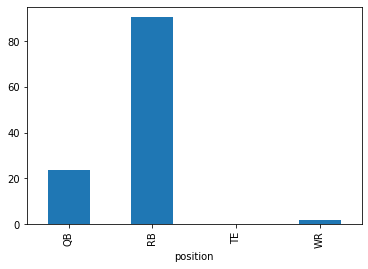

In [25]:
# compating mean rush attempts by position

data.groupby(['position']).mean()['rush_att'].plot.bar()

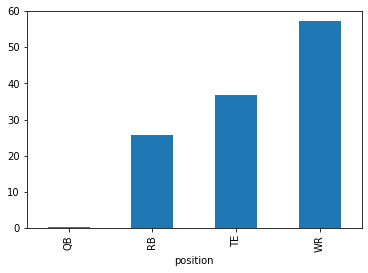

In [26]:
# compating mean fan pts by pos

data.groupby(['position']).mean()['rec_tgt'].plot.bar()

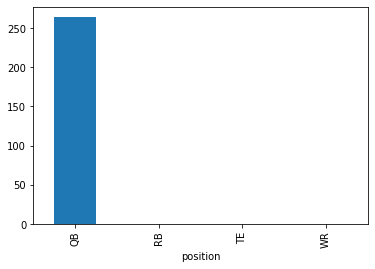

In [27]:
# compating mean fan pts by pos

data.groupby(['position']).mean()['pass_att'].plot.bar()

Th below code is used to encode the column position into numerical data. Based on the figures above, it is clear that position can change a players chances in specific categories. Thus, it is logical to reason that the position could have great impact on the model.In addition, the linear regression requires numberical data. The encoding was done using the get dummies function by pandas. We also used n-1 columns, since we could capture the same amount of informaion with less data. We then list the number of columns o confirm the columns were created.

In [28]:
# Categorical Encoding for Categorical DATA. i.e. Position

# this has to be done after analyzing data due to it getting rid of the position columns used in above 

# use the get dummies function to encode the categorical variables

# notice the drop_first attribute is used to drop one of the newly encoded columns

# having all encoded columns is unnecessary, as we can acess the same info using n-1

# this was used due to being easier to implement at the moment over OneHotEncoding

data = pd.get_dummies(data, columns = ['position'], drop_first = True)
 
# print the number of columns to verify additional columns were created.
    
print('number of columns:')
len(data.columns)

number of columns:


603

## 5. SEPERATING DATASET INTO LEARNING AND PREDICTION SETS

The below section of code is used to seperate the dataset into the learning and prediction sets. The learning set is the data that would be used to train and test the model while the prediction set is just the 2018-2019 season data, which will be used as inputs to predict the season total fantasy points in 2019-2020 season. These datasets were then saved to csv for storage and future analysis. Lastly, we quickly view and describe them to know what we are working with.

In [29]:
# SPLITTING THE RAW DATASET INTO LEARNING, PREDICTION and COMPLETE RAW DATA. 
# SAVING DATESETS AS CSV FILES.


# removing 2018 stats from learning dataset

model_dataset = data[data.year != 2018] 

# removing unnecessary data from the prediction data

projections = data[data.year == 2018]


In [30]:
# verify and view the learning dataset

model_dataset.head(5)

,player_id,blk_kick,blk_kick_ret_yd,cmp_pct,def_pass_def,def_td,ff,fg_blkd,fga,fgm,fgm_lng,fgm_pct,fum,fum_lost,fum_rec,fum_ret_yd,gms_active,gp,gs,int,int_ret_yd,kr,kr_lng,kr_td,kr_yd,kr_ypa,pass_2pt,pass_att,pass_cmp,pass_int,pass_lng,pass_rtg,pass_sack,pass_sack_yds,pass_td,pass_yd,pass_ypa,pass_ypc,pr,pr_lng,pr_td,pr_yd,pr_ypa,pts_allow,pts_ppr,pts_std,punt_avg,punt_blkd,punt_in_20,punt_net_avg,...,cumavg2_cumsum2_rec_td,cumavg2_cumsum2_rec_tgt,cumavg2_cumsum2_rec_yd,cumavg2_cumsum2_rec_ypr,cumavg2_cumsum2_rec_ypt,cumavg2_cumsum2_rush_2pt,cumavg2_cumsum2_rush_att,cumavg2_cumsum2_rush_lng,cumavg2_cumsum2_rush_td,cumavg2_cumsum2_rush_yd,cumavg2_cumsum2_rush_ypa,cumavg2_cumsum2_year,cumavg2_cumsum2_off_snp,cumavg2_cumsum2_st_snp,cumavg2_cumsum2_pass_fd,cumavg2_cumsum2_pts_half_ppr,cumavg2_cumsum2_punt_lng,cumavg2_cumsum2_rush_fd,cumavg2_cumsum2_td,cumavg2_cumsum2_bonus_pass_yd_300,cumavg2_cumsum2_bonus_pass_yd_400,cumavg2_cumsum2_bonus_rec_rb,cumavg2_cumsum2_bonus_rec_te,cumavg2_cumsum2_bonus_rec_wr,cumavg2_cumsum2_bonus_rec_yd_100,cumavg2_cumsum2_bonus_rec_yd_200,cumavg2_cumsum2_bonus_rush_yd_100,cumavg2_cumsum2_bonus_rush_yd_200,cumavg2_cumsum2_pass_inc,cumavg2_cumsum2_pass_cmp_40p,cumavg2_cumsum2_rec_40p,cumavg2_cumsum2_rec_fd,cumavg2_cumsum2_rush_40p,cumavg2_cumsum2_bonus_pass_cmp_25,cumavg2_cumsum2_bonus_rush_att_20,cumavg2_cumsum2_bonus_rush_rec_yd_100,cumavg2_cumsum2_bonus_rush_rec_yd_200,cumavg2_cumsum2_pass_td_40p,cumavg2_cumsum2_rec_0_4,cumavg2_cumsum2_rec_10_19,cumavg2_cumsum2_rec_20_29,cumavg2_cumsum2_rec_30_39,cumavg2_cumsum2_rec_5_9,cumavg2_cumsum2_rec_td_40p,cumavg2_cumsum2_rush_td_40p,birth_year,current_age,position_RB,position_TE,position_WR
86,670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7,1.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980,29,0,0,1
87,111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.8,63.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984,25,0,1,0
93,175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,25.0,54.0,0.0,635.0,25.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,14.0,0.0,90.0,5.3,0.0,64.0,42.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,24,0,0,1
115,695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,16.0,16.0,12.0,0.0,0.0,52.0,101.0,2.0,1296.0,24.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,28.0,5.6,0.0,94.2,56.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,24,0,0,1
127,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.2,109.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,24,0,1,0


In [31]:
# verify and view the projections dataset

projections.head(5)

,player_id,blk_kick,blk_kick_ret_yd,cmp_pct,def_pass_def,def_td,ff,fg_blkd,fga,fgm,fgm_lng,fgm_pct,fum,fum_lost,fum_rec,fum_ret_yd,gms_active,gp,gs,int,int_ret_yd,kr,kr_lng,kr_td,kr_yd,kr_ypa,pass_2pt,pass_att,pass_cmp,pass_int,pass_lng,pass_rtg,pass_sack,pass_sack_yds,pass_td,pass_yd,pass_ypa,pass_ypc,pr,pr_lng,pr_td,pr_yd,pr_ypa,pts_allow,pts_ppr,pts_std,punt_avg,punt_blkd,punt_in_20,punt_net_avg,...,cumavg2_cumsum2_rec_td,cumavg2_cumsum2_rec_tgt,cumavg2_cumsum2_rec_yd,cumavg2_cumsum2_rec_ypr,cumavg2_cumsum2_rec_ypt,cumavg2_cumsum2_rush_2pt,cumavg2_cumsum2_rush_att,cumavg2_cumsum2_rush_lng,cumavg2_cumsum2_rush_td,cumavg2_cumsum2_rush_yd,cumavg2_cumsum2_rush_ypa,cumavg2_cumsum2_year,cumavg2_cumsum2_off_snp,cumavg2_cumsum2_st_snp,cumavg2_cumsum2_pass_fd,cumavg2_cumsum2_pts_half_ppr,cumavg2_cumsum2_punt_lng,cumavg2_cumsum2_rush_fd,cumavg2_cumsum2_td,cumavg2_cumsum2_bonus_pass_yd_300,cumavg2_cumsum2_bonus_pass_yd_400,cumavg2_cumsum2_bonus_rec_rb,cumavg2_cumsum2_bonus_rec_te,cumavg2_cumsum2_bonus_rec_wr,cumavg2_cumsum2_bonus_rec_yd_100,cumavg2_cumsum2_bonus_rec_yd_200,cumavg2_cumsum2_bonus_rush_yd_100,cumavg2_cumsum2_bonus_rush_yd_200,cumavg2_cumsum2_pass_inc,cumavg2_cumsum2_pass_cmp_40p,cumavg2_cumsum2_rec_40p,cumavg2_cumsum2_rec_fd,cumavg2_cumsum2_rush_40p,cumavg2_cumsum2_bonus_pass_cmp_25,cumavg2_cumsum2_bonus_rush_att_20,cumavg2_cumsum2_bonus_rush_rec_yd_100,cumavg2_cumsum2_bonus_rush_rec_yd_200,cumavg2_cumsum2_pass_td_40p,cumavg2_cumsum2_rec_0_4,cumavg2_cumsum2_rec_10_19,cumavg2_cumsum2_rec_20_29,cumavg2_cumsum2_rec_30_39,cumavg2_cumsum2_rec_5_9,cumavg2_cumsum2_rec_td_40p,cumavg2_cumsum2_rush_td_40p,birth_year,current_age,position_RB,position_TE,position_WR
43374,3396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,2.5,0.0,0.0,0.0,0.0,...,0.000000,1.161290,6.096774,0.412581,0.268065,0.0,0.0,0.0,0.032258,0.0,0.0,130.096774,11.322581,6.032258,0.0,1.125806,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.645161,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1992,26,0,0,1
43376,3199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,16.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.5,190.5,0.0,0.0,0.0,0.0,...,0.297872,5.744681,50.680851,0.517660,0.377872,0.0,0.0,0.0,0.000000,0.0,0.0,85.808511,36.510638,0.234043,0.0,8.855319,0.0,0.0,0.297872,0.0,0.0,0.0,0.0,4.170213,0.106383,0.0,0.0,0.0,0.0,0.0,0.021277,1.319149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993,25,0,0,1
43382,5781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996,22,0,0,1
43387,4981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,16.0,16.0,5.0,0.0,0.0,2.0,32.0,0.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.8,142.8,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994,24,0,0,1
43389,4614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000

- View the sizes of the two seperate datasets. It is most important that we are verifying that the datasets have the same number of clumns:


    - Learning Data (3,650 rows & 605 columns)
    
    - Projection Data (545 rows & 605 columns)
    

In [32]:
# size of the imported tables

print(f'Size of Learning Data Table: {model_dataset.shape}')
print(f'Size of Projections Data Table: {projections.shape}')

Size of Learning Data Table: (3650, 603)
Size of Projections Data Table: (545, 603)


Here, the model data has the number of columns narrowed down to those that can be calculated before the start of a season and the target which is PPR Fantasy Points. Keeping just the potential features that can be calculated  befroe the season prevents leakage. Based on the potential features, the basic logic of this model is previous performance represented in running cumulative stats can indicate future results.

In [33]:
# narrowing dataset to final potential features; removing all clearly unnecessary/unusable columns.

model_ready = model_dataset[[
    'pts_ppr', 'depth_chart_order', 'depth_chart_position', 'full_name', 'team', 'year', 
    'cumsum2_cmp_pct', 'cumsum2_fum', 'cumsum2_fum_lost', 'cumsum2_fum_rec', 'cumsum2_gms_active', 
    'cumsum2_gp', 'cumsum2_gs', 'cumsum2_kr', 'cumsum2_kr_lng', 'cumsum2_kr_td', 'cumsum2_kr_yd', 
    'cumsum2_kr_ypa', 'cumsum2_pass_2pt', 'cumsum2_pass_att', 'cumsum2_pass_cmp', 'cumsum2_pass_int', 
    'cumsum2_pass_lng', 'cumsum2_pass_rtg', 'cumsum2_pass_sack', 'cumsum2_pass_sack_yds', 'cumsum2_pass_td', 
    'cumsum2_pass_yd', 'cumsum2_pass_ypa', 'cumsum2_pass_ypc', 'cumsum2_pr', 'cumsum2_pr_lng', 'cumsum2_pr_td', 
    'cumsum2_pr_yd', 'cumsum2_pr_ypa', 'cumsum2_rec', 'cumsum2_rec_2pt', 'cumsum2_rec_lng', 'cumsum2_rec_pct', 
    'cumsum2_rec_td', 'cumsum2_rec_tgt', 'cumsum2_rec_yd','cumsum2_rec_ypr', 'cumsum2_rec_ypt', 'cumsum2_rush_2pt', 
    'cumsum2_rush_att', 'cumsum2_rush_lng', 'cumsum2_rush_td', 'cumsum2_rush_yd', 'cumsum2_rush_ypa', 
    'cumsum2_year', 'cumsum2_off_snp', 'cumsum2_st_snp', 'cumsum2_td', 'cumsum2_bonus_pass_yd_300', 
    'cumsum2_bonus_pass_yd_400', 'cumsum2_bonus_rec_rb', 'cumsum2_bonus_rec_te', 'cumsum2_bonus_rec_wr', 
    'cumsum2_bonus_rec_yd_100', 'cumsum2_bonus_rec_yd_200', 'cumsum2_bonus_rush_yd_100', 
    'cumsum2_bonus_rush_yd_200', 'cumsum2_pass_inc', 'cumsum2_pass_cmp_40p', 'cumsum2_rec_40p', 'cumsum2_rec_fd', 
    'cumsum2_rush_40p', 'cumsum2_bonus_pass_cmp_25', 'cumsum2_bonus_rush_att_20', 'cumsum2_bonus_rush_rec_yd_100', 
    'cumsum2_bonus_rush_rec_yd_200', 'cumsum2_pass_td_40p','cumsum2_rec_0_4', 'cumsum2_rec_10_19', 
    'cumsum2_rec_20_29', 'cumsum2_rec_30_39', 'cumsum2_rec_5_9', 'cumsum2_rec_td_40p', 'cumsum2_rush_td_40p', 
    'cumavg2_cumsum2_cmp_pct', 'cumavg2_cumsum2_fum', 'cumavg2_cumsum2_fum_lost',  'cumavg2_cumsum2_fum_rec', 
    'cumavg2_cumsum2_gms_active', 'cumavg2_cumsum2_gp', 'cumavg2_cumsum2_gs', 'cumavg2_cumsum2_kr', 
    'cumavg2_cumsum2_kr_lng', 'cumavg2_cumsum2_kr_td', 'cumavg2_cumsum2_kr_yd', 'cumavg2_cumsum2_kr_ypa', 
    'cumavg2_cumsum2_pass_2pt', 'cumavg2_cumsum2_pass_att', 'cumavg2_cumsum2_pass_cmp', 'cumavg2_cumsum2_pass_int', 
    'cumavg2_cumsum2_pass_lng', 'cumavg2_cumsum2_pass_rtg', 'cumavg2_cumsum2_pass_sack', 
    'cumavg2_cumsum2_pass_sack_yds', 'cumavg2_cumsum2_pass_td', 'cumavg2_cumsum2_pass_yd', 'cumavg2_cumsum2_pass_ypa',
    'cumavg2_cumsum2_pass_ypc', 'cumavg2_cumsum2_pr', 'cumavg2_cumsum2_pr_lng', 'cumavg2_cumsum2_pr_td', 
    'cumavg2_cumsum2_pr_yd', 'cumavg2_cumsum2_pr_ypa', 'cumavg2_cumsum2_rec', 'cumavg2_cumsum2_rec_2pt', 
    'cumavg2_cumsum2_rec_lng', 'cumavg2_cumsum2_rec_pct','cumavg2_cumsum2_rec_td', 'cumavg2_cumsum2_rec_tgt', 
    'cumavg2_cumsum2_rec_yd', 'cumavg2_cumsum2_rec_ypr', 'cumavg2_cumsum2_rec_ypt', 'cumavg2_cumsum2_rush_2pt', 
    'cumavg2_cumsum2_rush_att', 'cumavg2_cumsum2_rush_lng', 'cumavg2_cumsum2_rush_td', 'cumavg2_cumsum2_rush_yd', 
    'cumavg2_cumsum2_rush_ypa', 'cumavg2_cumsum2_off_snp', 'cumavg2_cumsum2_st_snp', 'cumavg2_cumsum2_td', 
    'cumavg2_cumsum2_bonus_pass_yd_300', 'cumavg2_cumsum2_bonus_pass_yd_400', 'cumavg2_cumsum2_bonus_rec_rb', 
    'cumavg2_cumsum2_bonus_rec_te', 'cumavg2_cumsum2_bonus_rec_wr', 'cumavg2_cumsum2_bonus_rec_yd_100', 
    'cumavg2_cumsum2_bonus_rec_yd_200', 'cumavg2_cumsum2_bonus_rush_yd_100', 'cumavg2_cumsum2_bonus_rush_yd_200', 
    'cumavg2_cumsum2_pass_inc', 'cumavg2_cumsum2_pass_cmp_40p', 'cumavg2_cumsum2_rec_40p', 'cumavg2_cumsum2_rec_fd', 
    'cumavg2_cumsum2_rush_40p', 'cumavg2_cumsum2_bonus_pass_cmp_25', 'cumavg2_cumsum2_bonus_rush_att_20', 
    'cumavg2_cumsum2_bonus_rush_rec_yd_100', 'cumavg2_cumsum2_bonus_rush_rec_yd_200', 'cumavg2_cumsum2_pass_td_40p',
    'cumavg2_cumsum2_rec_0_4', 'cumavg2_cumsum2_rec_10_19', 'cumavg2_cumsum2_rec_20_29', 'cumavg2_cumsum2_rec_30_39', 
    'cumavg2_cumsum2_rec_5_9', 'cumavg2_cumsum2_rec_td_40p', 'cumavg2_cumsum2_rush_td_40p', 'position_RB', 
    'position_TE', 'position_WR', 'birth_year', 'current_age']]

In [34]:
# view the model data

model_ready.sort_values(by ='full_name', ascending=True)

,pts_ppr,depth_chart_order,depth_chart_position,full_name,team,year,cumsum2_cmp_pct,cumsum2_fum,cumsum2_fum_lost,cumsum2_fum_rec,cumsum2_gms_active,cumsum2_gp,cumsum2_gs,cumsum2_kr,cumsum2_kr_lng,cumsum2_kr_td,cumsum2_kr_yd,cumsum2_kr_ypa,cumsum2_pass_2pt,cumsum2_pass_att,cumsum2_pass_cmp,cumsum2_pass_int,cumsum2_pass_lng,cumsum2_pass_rtg,cumsum2_pass_sack,cumsum2_pass_sack_yds,cumsum2_pass_td,cumsum2_pass_yd,cumsum2_pass_ypa,cumsum2_pass_ypc,cumsum2_pr,cumsum2_pr_lng,cumsum2_pr_td,cumsum2_pr_yd,cumsum2_pr_ypa,cumsum2_rec,cumsum2_rec_2pt,cumsum2_rec_lng,cumsum2_rec_pct,cumsum2_rec_td,cumsum2_rec_tgt,cumsum2_rec_yd,cumsum2_rec_ypr,cumsum2_rec_ypt,cumsum2_rush_2pt,cumsum2_rush_att,cumsum2_rush_lng,cumsum2_rush_td,cumsum2_rush_yd,cumsum2_rush_ypa,...,cumavg2_cumsum2_pr_ypa,cumavg2_cumsum2_rec,cumavg2_cumsum2_rec_2pt,cumavg2_cumsum2_rec_lng,cumavg2_cumsum2_rec_pct,cumavg2_cumsum2_rec_td,cumavg2_cumsum2_rec_tgt,cumavg2_cumsum2_rec_yd,cumavg2_cumsum2_rec_ypr,cumavg2_cumsum2_rec_ypt,cumavg2_cumsum2_rush_2pt,cumavg2_cumsum2_rush_att,cumavg2_cumsum2_rush_lng,cumavg2_cumsum2_rush_td,cumavg2_cumsum2_rush_yd,cumavg2_cumsum2_rush_ypa,cumavg2_cumsum2_off_snp,cumavg2_cumsum2_st_snp,cumavg2_cumsum2_td,cumavg2_cumsum2_bonus_pass_yd_300,cumavg2_cumsum2_bonus_pass_yd_400,cumavg2_cumsum2_bonus_rec_rb,cumavg2_cumsum2_bonus_rec_te,cumavg2_cumsum2_bonus_rec_wr,cumavg2_cumsum2_bonus_rec_yd_100,cumavg2_cumsum2_bonus_rec_yd_200,cumavg2_cumsum2_bonus_rush_yd_100,cumavg2_cumsum2_bonus_rush_yd_200,cumavg2_cumsum2_pass_inc,cumavg2_cumsum2_pass_cmp_40p,cumavg2_cumsum2_rec_40p,cumavg2_cumsum2_rec_fd,cumavg2_cumsum2_rush_40p,cumavg2_cumsum2_bonus_pass_cmp_25,cumavg2_cumsum2_bonus_rush_att_20,cumavg2_cumsum2_bonus_rush_rec_yd_100,cumavg2_cumsum2_bonus_rush_rec_yd_200,cumavg2_cumsum2_pass_td_40p,cumavg2_cumsum2_rec_0_4,cumavg2_cumsum2_rec_10_19,cumavg2_cumsum2_rec_20_29,cumavg2_cumsum2_rec_30_39,cumavg2_cumsum2_rec_5_9,cumavg2_cumsum2_rec_td_40p,cumavg2_cumsum2_rush_td_40p,position_RB,position_TE,position_WR,birth_year,current_age
42076,55.4,12.0,TE,AJ Derby,0,2017,0.0,1.0,1.0,0.0,10.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,61.0,433.4,0.0,20.0,160.0,10.00,8.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.761905,0.0,2.904762,20.638095,0.000000,0.952381,7.619048,0.476190,0.380952,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.761905,3.047619,0.000000,0.0,0.0,0.000000,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1991,26
37346,30.0,12.0,TE,AJ Derby,0,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1991,25
29007,273.7,2.0,LWR,AJ Green,CIN,2015,0.0,7.0,3.0,0.0,60.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,294.0,230.2,35.0,573.0,4874.0,59.90,34.40,0.0,11.0,47.0,0.0,93.0,21.1,...,0.0,4.328947,0.0,3.868421,3.028947,0.460526,7.539474,64.131579,0.788158,0.452632,0.0,0.144737,0.618421,0.000000,1.223684,0.277632,35.039474,0.026316,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1988,27
9361,218.0,2.0,LWR,AJ Green,CIN,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.

## 6. FEATURE SELECTION USING A FILTERING METHOD; PEARSON CORRELATION

Here, feature selection is performed using a filtering method (i.e. Pearson Correlatin). This allow us to speed up the model by minimizing the data going in. In addition, the model should get better by using the best quality features available. The process of how this form of feature selection works is below:

1. A correlation was run between each feature in the dataset with PPR Fantasy Points


2. Next, the absolute value of the correlation coefficient value was taken and the features were ranked. The correlation coefficient value represents how strong a relationship is between two variables. Thus, the logic stronger relationships will serve as better features in a Linear Regression model.


3. Finally, values greater than 0.035 were removed and the remaining went to the model.

___

In [35]:
# USING A FILTERING METHOD FOR FEATURE SELETION; PEARSON CORRELATION

cor = model_ready.corr()

# take the absolute value of the correlations as they range from 1 to -1 to compare 

cor_target = abs(cor["pts_ppr"])

# identify relavant feature through measuring relationship

relevant_features = cor_target[cor_target>0.035]

# save the identified features in a variable for future use

features = list(relevant_features.index)

# remove pts_ppr as this is the target and will have a relationship of 1.

features.remove('pts_ppr')

# view the list of new features

print('Features:')
print(' ')
print(list(features))

Features:
 
['depth_chart_order', 'year', 'cumsum2_cmp_pct', 'cumsum2_fum', 'cumsum2_fum_lost', 'cumsum2_gms_active', 'cumsum2_gp', 'cumsum2_gs', 'cumsum2_kr_lng', 'cumsum2_pass_2pt', 'cumsum2_pass_att', 'cumsum2_pass_cmp', 'cumsum2_pass_int', 'cumsum2_pass_lng', 'cumsum2_pass_rtg', 'cumsum2_pass_sack', 'cumsum2_pass_sack_yds', 'cumsum2_pass_td', 'cumsum2_pass_yd', 'cumsum2_pass_ypa', 'cumsum2_pass_ypc', 'cumsum2_pr', 'cumsum2_pr_lng', 'cumsum2_pr_td', 'cumsum2_pr_yd', 'cumsum2_pr_ypa', 'cumsum2_rec', 'cumsum2_rec_2pt', 'cumsum2_rec_lng', 'cumsum2_rec_pct', 'cumsum2_rec_td', 'cumsum2_rec_tgt', 'cumsum2_rec_yd', 'cumsum2_rec_ypr', 'cumsum2_rec_ypt', 'cumsum2_rush_2pt', 'cumsum2_rush_att', 'cumsum2_rush_lng', 'cumsum2_rush_td', 'cumsum2_rush_yd', 'cumsum2_rush_ypa', 'cumsum2_year', 'cumsum2_off_snp', 'cumsum2_st_snp', 'cumsum2_td', 'cumsum2_bonus_pass_yd_300', 'cumsum2_bonus_pass_yd_400', 'cumsum2_bonus_rec_rb', 'cumsum2_bonus_rec_wr', 'cumsum2_bonus_rec_yd_100', 'cumsum2_bonus_rec_yd_20

## 7. LINEAR REGRESION; BUILDING AND TESTING THE MODEL

## A. MODEL SETTINGS

Setting the X and y variables. The X includes the list of featurese selected in feature selection above and the y is the target, Fantsay Points (PPR).

In [36]:
# Assigning X and y variables.

# The X variable is equal to the feature dataset.

X = model_ready[features].values

# The y variable is equal to the target value.

y = model_ready['pts_ppr'].values

Below the data from the X and y data are split into testing and traing sets at random. The testing dataset is set to be 27% of the dataset.

In [37]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=0)

The below fits the model to the training data.

In [38]:
# training the model

regressor = LinearRegression()  
reg_model = regressor.fit(X_train, y_train)


Lastly the predictions are mad on the tesing data which will be analyzed to measure the performance of the model.

In [39]:
# test the model and make predictions from testing data

y_pred = regressor.predict(X_test)

## B. ANALYSIS OF MODEL PERFORAMANCE; TESTING

Here we check diagnostics around how the data fit to the model and we print the coefficients for each feature, the y intercept and the R^2 value.  


In [40]:
# print the coefficients, intercept and the R squared value

print(f'Coefficients: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')
print(f'R^2 score: {regressor.score(X, y)}')

Coefficients: [ 1.91771430e+00 -7.41248599e+00 -5.55048003e-02 -1.10064166e+00
  9.77812095e-01  1.32796047e+00 -1.00716040e+00  1.65759288e-01
 -1.05409785e-01  4.83704507e-01  1.62458999e-01 -2.62552980e-01
 -1.13389454e+00 -2.22739097e-01  1.21304153e-01  8.74916091e-01
 -1.57524838e-02  6.56231774e-01 -3.93852530e-04  1.21102113e+00
 -1.04814144e+00 -7.69785824e-02  6.62897972e-03 -1.50282872e+00
  2.61643176e-02 -4.88505531e-02  3.27212932e-03  5.20312291e+00
 -9.75726288e-02  4.41583639e-02 -4.85267762e-01 -1.38105379e-01
  6.80651651e-03 -1.14720341e-01  1.39011379e+00 -7.25226214e+00
  3.11464496e-02  2.73064779e-02 -1.45292749e+00 -8.06212392e-03
  5.69863621e-01 -1.86857530e-03  4.77274677e-03  2.02974534e-02
 -2.04491178e+00 -8.73887840e+00 -1.42051320e+00 -2.05744565e-02
  6.98627558e-01 -1.29059467e+01  8.12723961e+01  3.66424854e+00
  6.63467057e-02  6.37814056e+00  3.59296066e+01 -8.25198345e+01
 -2.67109624e+01  4.89888180e+01  4.57061989e+00 -2.36814612e+00
 -3.1675920

A table was created to view some of the acutual points vs the predictions in the model testing. It is clear the model is way off on some of the predictions.

In [41]:
# preview of predicted vs actual value table

pred_act_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_act_table.head(10)

,Actual,Predicted
0,156.2,122.753086
1,114.8,135.395297
2,96.6,218.389646
3,42.9,154.462678
4,285.2,143.553238
5,2.3,57.053691
6,8.9,63.692237
7,310.3,299.684091
8,19.3,64.730715
9,56.5,75.968665


Below the data from the previous table are visualized to represent the actul vs preditions from the models testing. It is clear we have a range of results. Some instances we are really close and others where the predictions are way off and even to the point of some predictions being negative. From a logical standpoint it is hard to imagine a scenario where a player scores negative points on the season although it is possible.

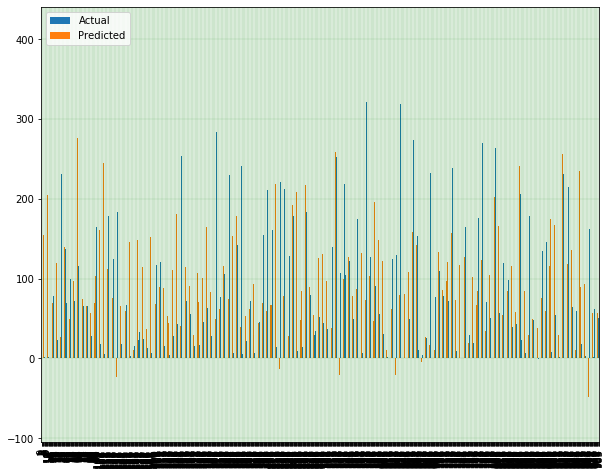

In [42]:
# bar graph of actual vs predecited Fan Points

pred_act_table.plot(kind ='bar', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.show(10)

#### Below are the primary metrics to meausure and compare the models performance. Please see each one explained in more detail below:


**1. Mean Absulute Error:**

The mean abslute error is the mean gap between the actual and predicted values in the testing dataset. The absilute value is taken beause the value depending on the target feature could be below or above the value.

**2. Mean Squered Error:**

The mean squared error represents the distance between the line and the data points. This ditance is the errror and by taking this and squaring them. This method gives more weight to larger differences.

**3. Root Mean Squared Error:**

The root mean squared error is the standard deviation of a typical observed value from our model’s prediction. This shows our models accuracy by amplifying the error in the predictions.

In [43]:
# print model metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance:',metrics.explained_variance_score(y_test, y_pred))

Mean Absolute Error: 54.98883396443829
Mean Squared Error: 5113.918826852743
Root Mean Squared Error: 71.5116691656176
Explained Variance: 0.3242658970179113


# 8. Cross Validation

In this section we use cross validation to verify the findings we currently have are accurate and we cn trust them. We do this by splitting the entire dataset into equal sets of 2, 4, 8 and 10 then running the regrassion and measuring the performance. You would expect that an accurate model would have similar results no matter the split while an innacurate model might have varying scores in each run. 

In [44]:
# Cross Validation; Verifying the above analysis using KFold

cv_2_scores = cross_val_score(regressor, X, y, cv=2)
cv_4_scores = cross_val_score(regressor, X, y, cv=4)
cv_8_scores = cross_val_score(regressor, X, y, cv=8)
cv_10_scores = cross_val_score(regressor, X, y, cv=10)

Here we print the metrics from the cross validaion. This includes:


**Mean Cross Validation Scores:** The mean score from the resuts of varying splits of 2, 4, 8 and 10. 


**Standard Deviation of Validation Scores:** The standard deviation the resuts of varying splits of 2, 4, 8 and 10.  


**List of Cross Validation Scores:** The raw scores that were used in calculating the above score and standard deviation.

In [45]:
# Cross Validation Results

print('CROSS VALIDATION RESULTS:')
print('')
print('List of Mean Cross Validation Scores for 2, 4, 8 & 10 Sets')
print('CV_2:', cv_2_scores.mean())
print('CV_4:', cv_4_scores.mean())
print('CV_8:', cv_8_scores.mean())
print('CV_10:', cv_10_scores.mean())
print('')
print('')
print('List of Standard Deviation of Validation Scores for 2, 4, 8 & 10 Sets')
print('CV_2:', cv_2_scores.std())
print('CV_4:', cv_4_scores.std())
print('CV_8:', cv_8_scores.std())
print('CV_10:', cv_10_scores.std())
print('')
print('')
print('List of Cross Validation Scores for 2, 4, 8 & 10 Sets')
print('CV_2:', cv_2_scores)
print('CV_4:', cv_4_scores)
print('CV_8:', cv_8_scores)
print('CV_10:', cv_10_scores)
print('')
print('')

CROSS VALIDATION RESULTS:

List of Mean Cross Validation Scores for 2, 4, 8 & 10 Sets
CV_2: -0.09260997784999597
CV_4: 0.1920193432894759
CV_8: 0.07832147658259603
CV_10: -0.18678687523054643


List of Standard Deviation of Validation Scores for 2, 4, 8 & 10 Sets
CV_2: 0.15789644743008818
CV_4: 0.22213184495877014
CV_8: 0.6679291706876236
CV_10: 1.5077041171930359


List of Cross Validation Scores for 2, 4, 8 & 10 Sets
CV_2: [ 0.06528647 -0.25050643]
CV_4: [ 0.22693525  0.39551984  0.32412515 -0.17850287]
CV_8: [ 0.08881992  0.39861098  0.38398469  0.40942181  0.3705965   0.30605454
  0.33942432 -1.67034095]
CV_10: [ 0.06462613  0.36071571  0.42969772  0.38408857  0.40010238  0.36212892
  0.30238451  0.34393057 -4.69889274  0.18334948]




In [46]:
# visualize cross validation results



In [47]:
# Permutation Analysis



## 9. MODEL PREDICTIONS; PREDICTING 2019 SEASON FANTASY POINTS

This section is where the value of the model is displayed, where the trained and tested model is used to make predictions on the previously seperate 2018-19 season data (i.e. prediction set). Here, the models capabilities of predicting season total Fantasy Points are displayed on real data. Those predictions are then sent to a spreadsheet where players are ranked by thier predicted season total Fantasy Points. An example of where thi may provide value is a way to rank players in order from highest to lowest predicted scores as a tool in the draft to select higher performers.

preview of the projections table

In [48]:
# preview view projections table.

projections.head(5)

,player_id,blk_kick,blk_kick_ret_yd,cmp_pct,def_pass_def,def_td,ff,fg_blkd,fga,fgm,fgm_lng,fgm_pct,fum,fum_lost,fum_rec,fum_ret_yd,gms_active,gp,gs,int,int_ret_yd,kr,kr_lng,kr_td,kr_yd,kr_ypa,pass_2pt,pass_att,pass_cmp,pass_int,pass_lng,pass_rtg,pass_sack,pass_sack_yds,pass_td,pass_yd,pass_ypa,pass_ypc,pr,pr_lng,pr_td,pr_yd,pr_ypa,pts_allow,pts_ppr,pts_std,punt_avg,punt_blkd,punt_in_20,punt_net_avg,...,cumavg2_cumsum2_rec_td,cumavg2_cumsum2_rec_tgt,cumavg2_cumsum2_rec_yd,cumavg2_cumsum2_rec_ypr,cumavg2_cumsum2_rec_ypt,cumavg2_cumsum2_rush_2pt,cumavg2_cumsum2_rush_att,cumavg2_cumsum2_rush_lng,cumavg2_cumsum2_rush_td,cumavg2_cumsum2_rush_yd,cumavg2_cumsum2_rush_ypa,cumavg2_cumsum2_year,cumavg2_cumsum2_off_snp,cumavg2_cumsum2_st_snp,cumavg2_cumsum2_pass_fd,cumavg2_cumsum2_pts_half_ppr,cumavg2_cumsum2_punt_lng,cumavg2_cumsum2_rush_fd,cumavg2_cumsum2_td,cumavg2_cumsum2_bonus_pass_yd_300,cumavg2_cumsum2_bonus_pass_yd_400,cumavg2_cumsum2_bonus_rec_rb,cumavg2_cumsum2_bonus_rec_te,cumavg2_cumsum2_bonus_rec_wr,cumavg2_cumsum2_bonus_rec_yd_100,cumavg2_cumsum2_bonus_rec_yd_200,cumavg2_cumsum2_bonus_rush_yd_100,cumavg2_cumsum2_bonus_rush_yd_200,cumavg2_cumsum2_pass_inc,cumavg2_cumsum2_pass_cmp_40p,cumavg2_cumsum2_rec_40p,cumavg2_cumsum2_rec_fd,cumavg2_cumsum2_rush_40p,cumavg2_cumsum2_bonus_pass_cmp_25,cumavg2_cumsum2_bonus_rush_att_20,cumavg2_cumsum2_bonus_rush_rec_yd_100,cumavg2_cumsum2_bonus_rush_rec_yd_200,cumavg2_cumsum2_pass_td_40p,cumavg2_cumsum2_rec_0_4,cumavg2_cumsum2_rec_10_19,cumavg2_cumsum2_rec_20_29,cumavg2_cumsum2_rec_30_39,cumavg2_cumsum2_rec_5_9,cumavg2_cumsum2_rec_td_40p,cumavg2_cumsum2_rush_td_40p,birth_year,current_age,position_RB,position_TE,position_WR
43374,3396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,2.5,0.0,0.0,0.0,0.0,...,0.000000,1.161290,6.096774,0.412581,0.268065,0.0,0.0,0.0,0.032258,0.0,0.0,130.096774,11.322581,6.032258,0.0,1.125806,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.645161,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1992,26,0,0,1
43376,3199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,16.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.5,190.5,0.0,0.0,0.0,0.0,...,0.297872,5.744681,50.680851,0.517660,0.377872,0.0,0.0,0.0,0.000000,0.0,0.0,85.808511,36.510638,0.234043,0.0,8.855319,0.0,0.0,0.297872,0.0,0.0,0.0,0.0,4.170213,0.106383,0.0,0.0,0.0,0.0,0.0,0.021277,1.319149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993,25,0,0,1
43382,5781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996,22,0,0,1
43387,4981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,16.0,16.0,5.0,0.0,0.0,2.0,32.0,0.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.8,142.8,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994,24,0,0,1
43389,4614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000

Setting the x ans Y for the projections table, which are the exact same features as the trained and tested model.

In [49]:
# making predictions on prediction set

proj_X = projections[features].values

proj_y = projections['pts_ppr'].values

Calculate the projections and add them to the dataset.

In [50]:
# predict future projected fan points and add to projections dataframe

projections['pred_score'] = regressor.predict(proj_X)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Create a new dataframe with with the columns to display name and predicted score. The table was then sorted from greatest to least Fantasy Points.

In [51]:
# create a new table for final results of projections sorted by the predicted score

results = projections[['full_name','pred_score']].sort_values(by=['pred_score'], ascending=False)

A new column in added calculating the average amount of fantasy points per game. This was done by taking the total predicted Fantasy Points and dividing it by the potential 16 games in a season.

In [52]:
# add column to resuts to calculate game average

results['proj_ppg'] = results['pred_score']/16

Previewing the new projections table and print the projections dataframe to a csv file for future use.

In [53]:
# create a csv print out of the projected fan points

results.to_csv('2. model predictions.csv')

# print preview of projections table saved to csv below

results.head(100)

,full_name,pred_score,proj_ppg
44909,Julio Jones,395.985231,24.749077
43725,Aaron Rodgers,384.800037,24.050002
44548,Odell Beckham Jr,365.617048,22.851066
45680,Antonio Brown,351.709991,21.981874
44008,Matt Barkley,347.140742,21.696296
47158,Carson Wentz,308.690775,19.293173
47500,Tom Brady,303.239134,18.952446
47996,Russell Wilson,299.824966,18.739060
45993,Jarvis Landry,277.565714,17.347857
43522,Cam Newton,275.019878,17.188742
